<a href="https://colab.research.google.com/github/mkbahk/QuantumComputing/blob/main/DensityMatrix_mkbahk_20250414.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install qiskit[visualization]==1.2.4
%pip install qiskit-aer==0.15.1
%pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 5.0 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=3f2e990bb656885976e71b0a27d1b6dc6627822ee4ee8a12c7db6da70dae4697
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 63.3 MB/s eta 0:00:00
  Cloning https://github.com/qisk

In [4]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile, assemble
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_state_city, plot_bloch_multivector
from qiskit_textbook.tools import array_to_latex
from qiskit_aer import Aer
from IPython.display import display, Math
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from qiskit.quantum_info import DensityMatrix
from qiskit_aer.noise import amplitude_damping_error, NoiseModel

In [6]:
# 밀도 행렬 시각화 함수 (2큐비트용)
def plot_density_matrix(dm, title='Density Matrix'):
    real = np.real(dm.data)
    imag = np.imag(dm.data)

    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    axs[0].imshow(real, cmap='RdBu', vmin=-1, vmax=1)
    axs[0].set_title(f'{title} (Real Part)')
    axs[1].imshow(imag, cmap='RdBu', vmin=-1, vmax=1)
    axs[1].set_title(f'{title} (Imag Part)')
    plt.show()
###def

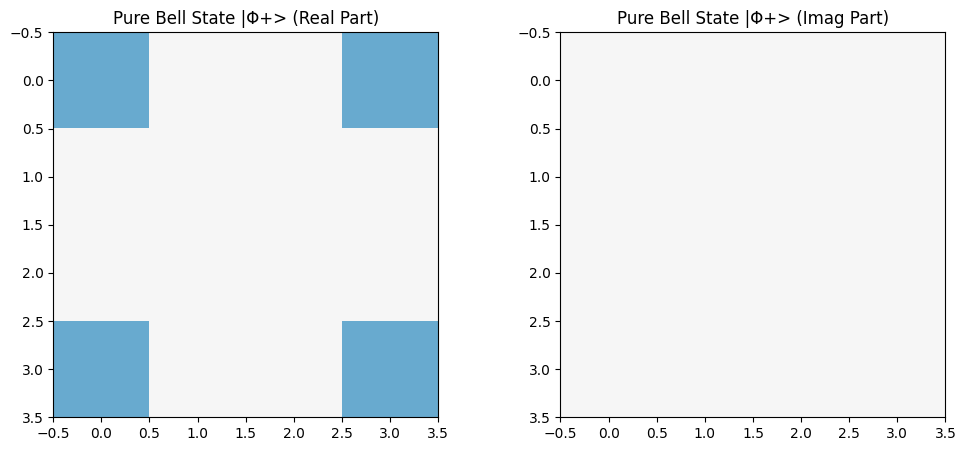

In [7]:
# 1. 벨 상태 생성: |Φ+> = (|00⟩ + |11⟩) / √2
qc_bell = QuantumCircuit(2)
qc_bell.h(0)
qc_bell.cx(0, 1)
dm_bell = DensityMatrix.from_instruction(qc_bell)
plot_density_matrix(dm_bell, 'Pure Bell State |Φ+>')

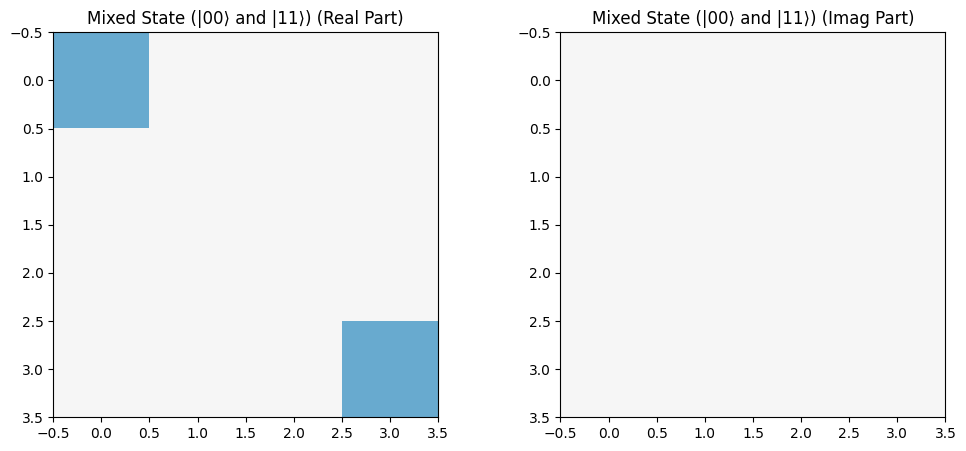

In [8]:
# 2. 혼합 상태: 0.5 * |00⟩⟨00| + 0.5 * |11⟩⟨11|
dm_00 = DensityMatrix.from_label('00')
dm_11 = DensityMatrix.from_label('11')
dm_mixed = 0.5 * dm_00 + 0.5 * dm_11
plot_density_matrix(dm_mixed, 'Mixed State (|00⟩ and |11⟩)')

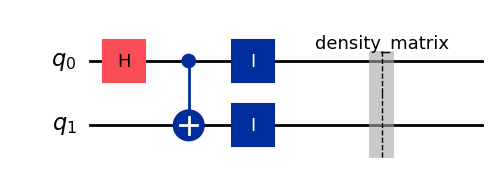

In [48]:
# 3. 노이즈 적용 (진폭 감쇠)
noise_model = NoiseModel()
error = amplitude_damping_error(0.6)
noise_model.add_all_qubit_quantum_error(error, ['id'])

qc_noisy = QuantumCircuit(2)
qc_noisy.h(0)
qc_noisy.cx(0, 1)
qc_noisy.id([0, 1])  # 노이즈 적용 위해 idle 시간 추가

qc_noisy.save_density_matrix()  # 🔥 이 부분 추가!!

qc_noisy.draw('mpl')

In [49]:
backend = Aer.get_backend('aer_simulator_density_matrix')
tr_noisy = transpile(qc_noisy, backend)
result = backend.run(tr_noisy, noise_model=noise_model).result()

In [50]:
result

Result(backend_name='aer_simulator_density_matrix', backend_version='0.15.1', qobj_id='', job_id='932db3fe-1bac-4b6b-b6bd-ee864ea4e011', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(density_matrix=DensityMatrix([[0.5+0.j, 0. +0.j, 0. +0.j, 0.5+0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
               [0.5+0.j, 0. +0.j, 0. +0.j, 0.5+0.j]],
              dims=(2, 2))), header=QobjExperimentHeader(creg_sizes=[], global_phase=0.0, memory_slots=0, n_qubits=2, name='circuit-185', qreg_sizes=[['q', 2]], metadata={}), status=DONE, seed_simulator=316229418, metadata={'time_taken': 0.00024448, 'num_bind_params': 1, 'parallel_state_update': 2, 'required_memory_mb': 1, 'input_qubit_map': [[1, 1], [0, 0]], 'method': 'density_matrix', 'device': 'CPU', 'num_qubits': 2, 'active_input_qubits': [0, 1], 'num_clbits': 0, 'remapped_qubits': False, 'parallel_shots': 1, 'runtime_p

In [51]:
result.data(0)

{'density_matrix': DensityMatrix([[0.5+0.j, 0. +0.j, 0. +0.j, 0.5+0.j],
                [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
                [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
                [0.5+0.j, 0. +0.j, 0. +0.j, 0.5+0.j]],
               dims=(2, 2))}

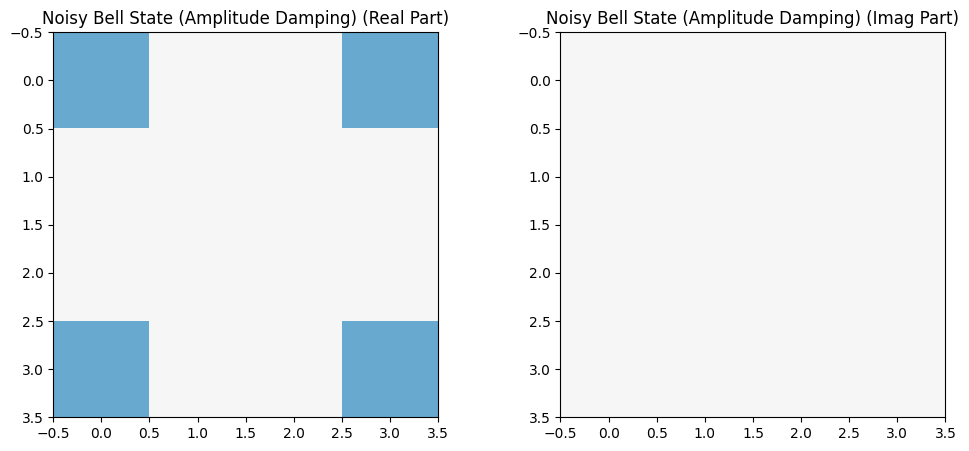

In [52]:
dm_noisy = DensityMatrix(result.data(0)['density_matrix'])

plot_density_matrix(dm_noisy, 'Noisy Bell State (Amplitude Damping)')